# تحلیل شبکه اجتماعی طرفداران داعش در پیامهای توییتر

In [44]:
import networkx as nx
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [45]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sns.set_style('whitegrid')

In [46]:
df=pd.read_csv('TweetISIS.csv')
df

name         username  \
0         GunsandCoffee  GunsandCoffee70   
1         GunsandCoffee  GunsandCoffee70   
2         GunsandCoffee  GunsandCoffee70   
3         GunsandCoffee  GunsandCoffee70   
4         GunsandCoffee  GunsandCoffee70   
...                 ...              ...   
17405       Anaksabil97          nvor85j   
17406       Anaksabil97          nvor85j   
17407       Anaksabil97          nvor85j   
17408       Anaksabil97          nvor85j   
17409  one who believes           ro34th   

                                             description     location  \
0           ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews          NaN   
1           ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews          NaN   
2           ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews          NaN   
3           ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews          NaN   
4           ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews          NaN   
...                                                  ...          ...   
17405                                                NaN          NaN   
17406                                                NaN          NaN   
17407                                                NaN          NaN   
17408                                                NaN          NaN   
17409  Torah Observant, follower of the Prophet Yeshu...  dar al-kufr   

       followers  numberstatuses             time  \
0            640              49   1/6/2015 21:07   
1            640              49   1/6/2015 21:27   
2            640              49   1/6/2015 21:29   
3            640              49   1/6/2015 21:37   
4            640              49   1/6/2015 21:45   
...          ...             ...              ...   
17405        238             133  5/13/2016 15:46   
17406        238             133  5/13/2016 15:50   
17407        238             133  5/13/2016 15:51   
17408        238             133  5/13/2016 16:07   
17409       1482           33091  5/13/2016 16:10   

                                                  tweets  
0      ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...  
1      ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...  
2      ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...  
3      ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...  
4      ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...  
...                                                  ...  
17405  #Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...  
17406  #Breaking\n\n Iraqi forces bulldozer destroyed...  
17407  #Breaking \n#AmaqAgency \n#IslamicState \n\n#E...  
17408  #PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...  
17409  #AmaqAgency Destroyed and burning Iraqi Forces...  

[17410 rows x 8 columns]

In [47]:
df=df[['name','followers']]
df

name  followers
0         GunsandCoffee        640
1         GunsandCoffee        640
2         GunsandCoffee        640
3         GunsandCoffee        640
4         GunsandCoffee        640
...                 ...        ...
17405       Anaksabil97        238
17406       Anaksabil97        238
17407       Anaksabil97        238
17408       Anaksabil97        238
17409  one who believes       1482

[17410 rows x 2 columns]

In [48]:
#df=df.head(110)

In [49]:
#df

In [50]:
# Read Our Edgelist
fs_graph = nx.from_pandas_edgelist(df,source="name",target="followers")

In [51]:
type(fs_graph)

networkx.classes.graph.Graph

In [52]:
# Info
print(fs_graph)

Graph with 401 nodes and 316 edges


In [53]:
# Check All Nodes/Object/People
fs_graph.nodes()

NodeView(('GunsandCoffee', 640, 'Abu Layth Al Hindi', 68, 'ابو الدرداء #خلافة', 904, 'abu baker aldimashqi', 112, 'IS_BAQIYA', 25, 119, 823, 'Kuffar Hunter 1', 324, 328, 362, 'al-Nusra', 350, 'War Reporter', 130, 'Abu Hanzalah', 128, 'The Witnesser', 427, 'Plea Of the Ummah!', 92, 623, 'Asim Abu Merjem', 742, 52, 50, 'abdlrhmn', 24, 'Mohamed Naseem', 2121, 'Maghrabi Arabie', 158, 'أبو أسامة الصومالي', 866, 129, 132, 'Bilal Ibn Rabah', 96, 139, 'Maisara al-Ghereeb', 197, 'Abu_Azzam25', 35, 'Abu khalid', 248, 'JOIN IS NATION', 873, 's.o.dawlah', 632, 'Abu Humayra', 193, 'fahad slyman alsomal', 19, 'General', 392, 'Abu Muhammad Ashami', 57, 'Musaafirah', 83, 'الولاء البراء', 411, 'Rami', 29209, 'Salahuddin Ayubi', 693, 'Marwan Qassami', 1593, 'Al-Battar English', 117, '٩ Flames of Haqq', 605, 'War BreakingNews', 7152, 'Abu Naseeha', 1016, 'Ansar al-Khilafah', 651, 'Ibni Haneefah', 1402, 'AL MUHAJIRUN', 192, 'Obi-Wan Al Coconuty', 1273, 'Maghrebi', 762, 2101, 377, 166, 224, 28492, 34, 783,

In [54]:
len(fs_graph.nodes())

401

In [55]:
len(fs_graph.edges())

316

C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9757 (\N{WHITE UP POINTING INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


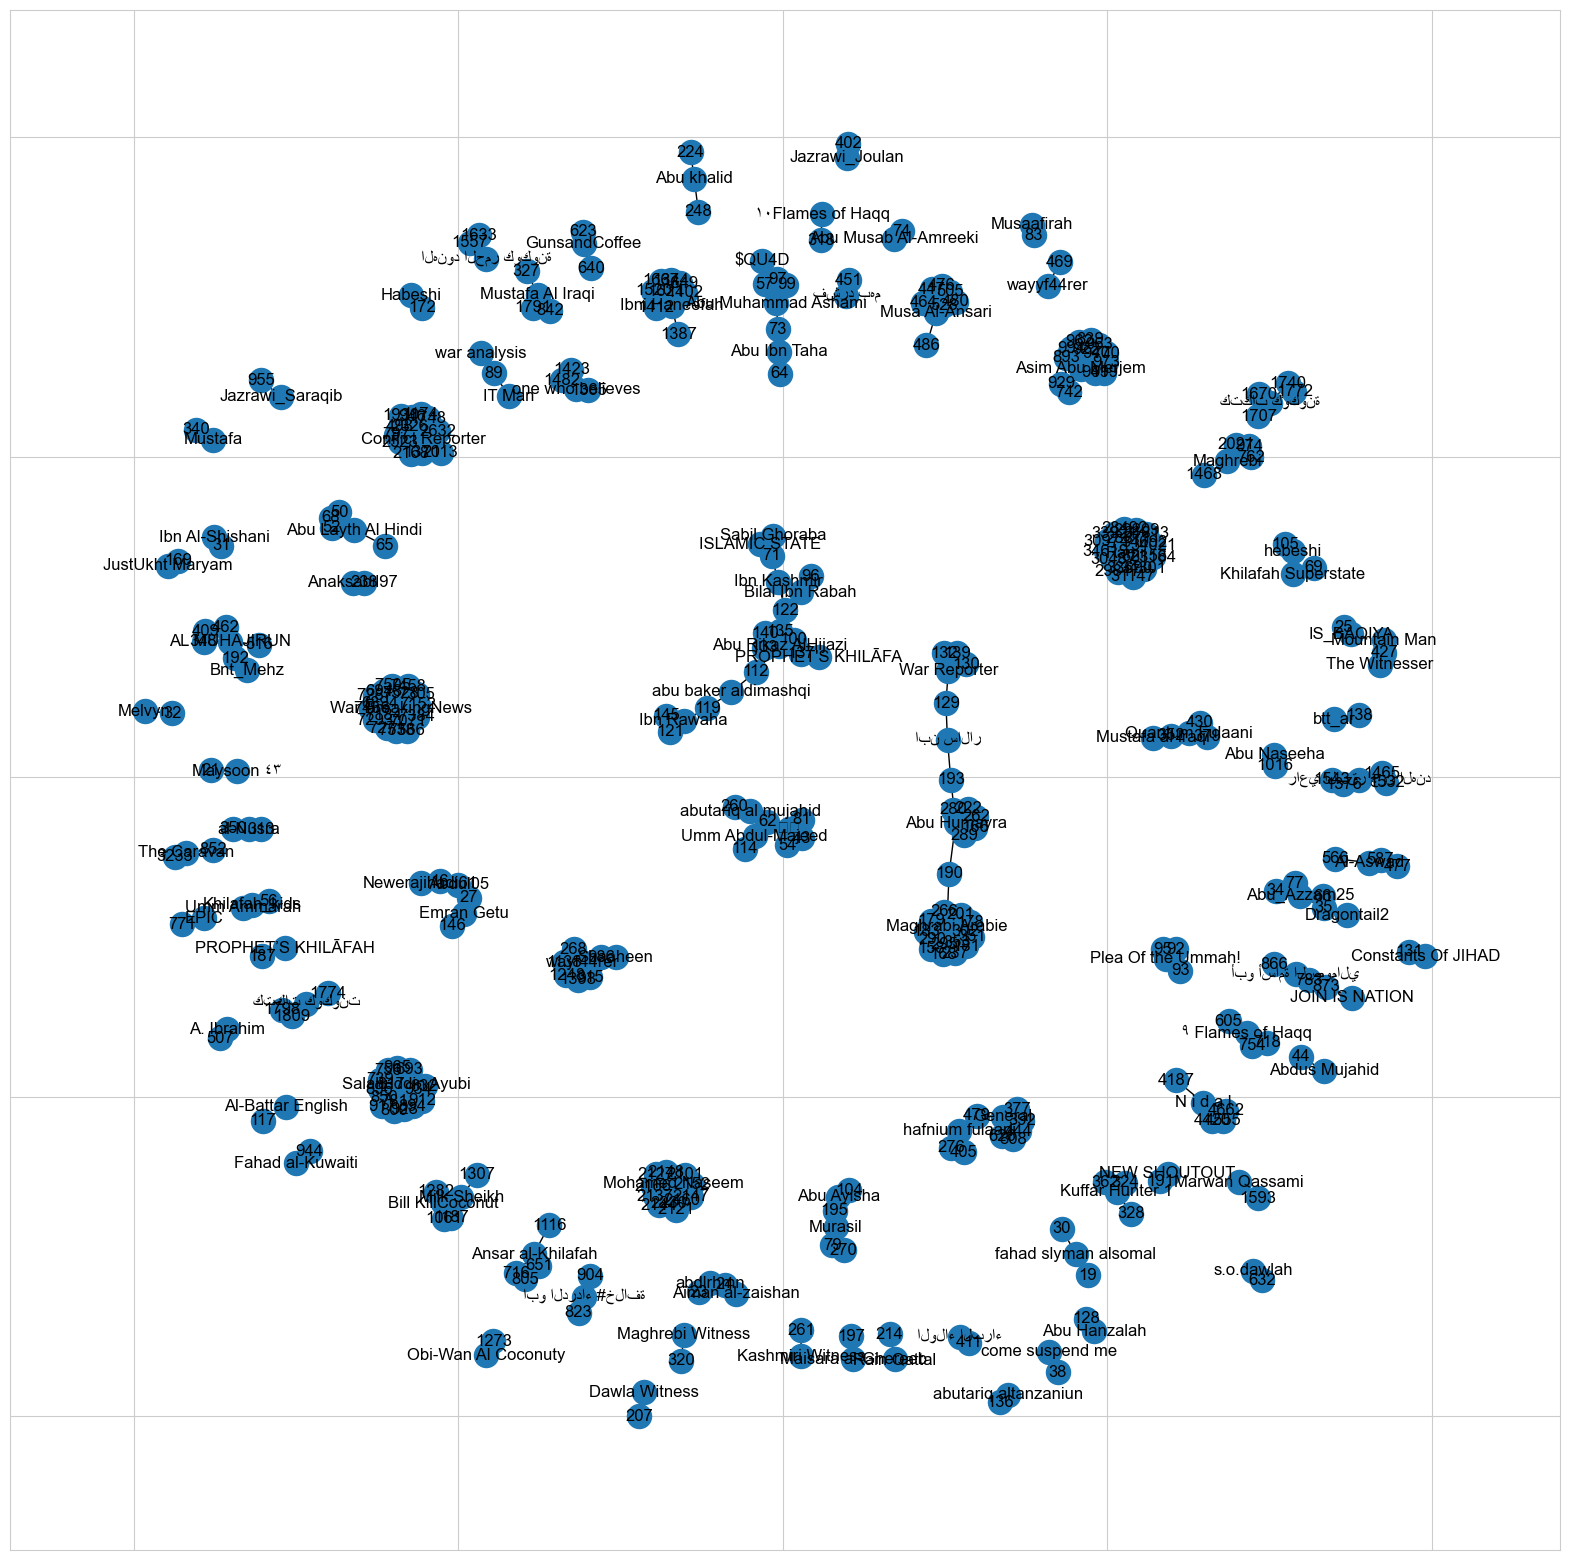

In [56]:
plt.figure(figsize=(20,20))
nx.draw_networkx(fs_graph)
plt.show()

C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9757 (\N{WHITE UP POINTING INDEX}) missing from current font.
  func(*args, **kwargs)
C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  func(*args, **kwargs)


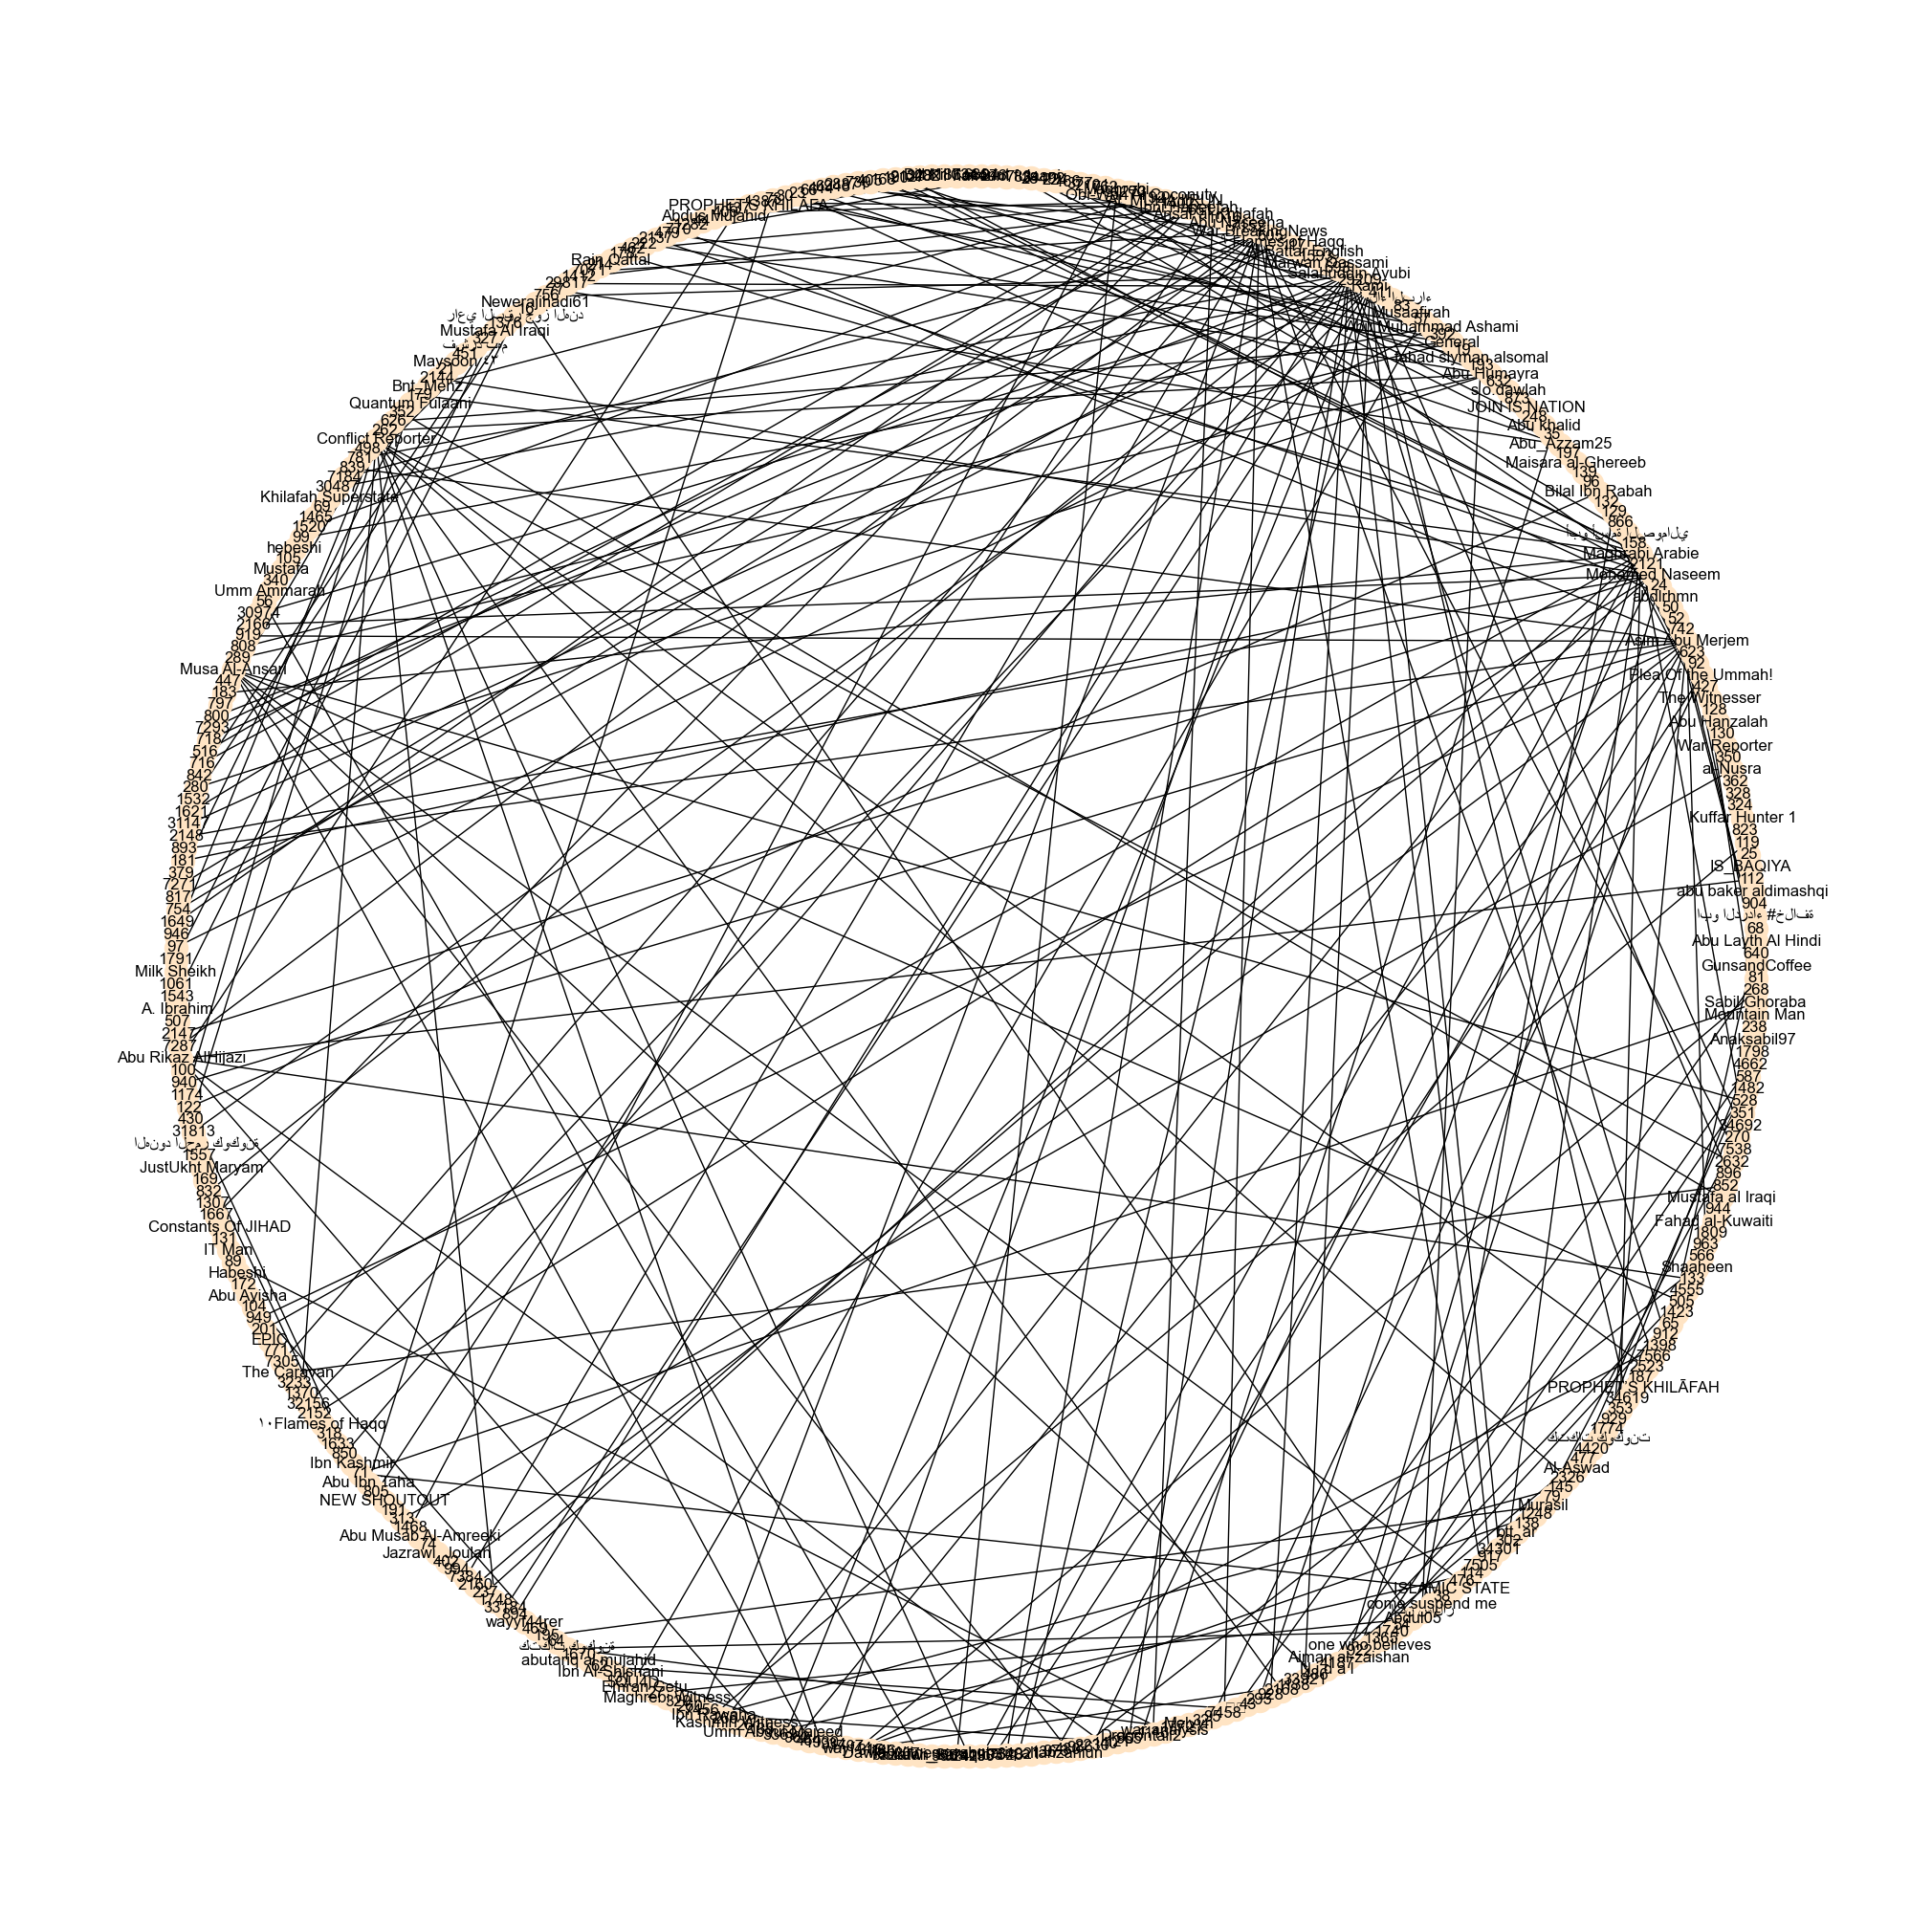

In [57]:
plt.figure(figsize=(20,20))
nx.draw_circular(fs_graph, node_color='bisque', with_labels=True)

In [58]:
G=fs_graph.to_undirected()

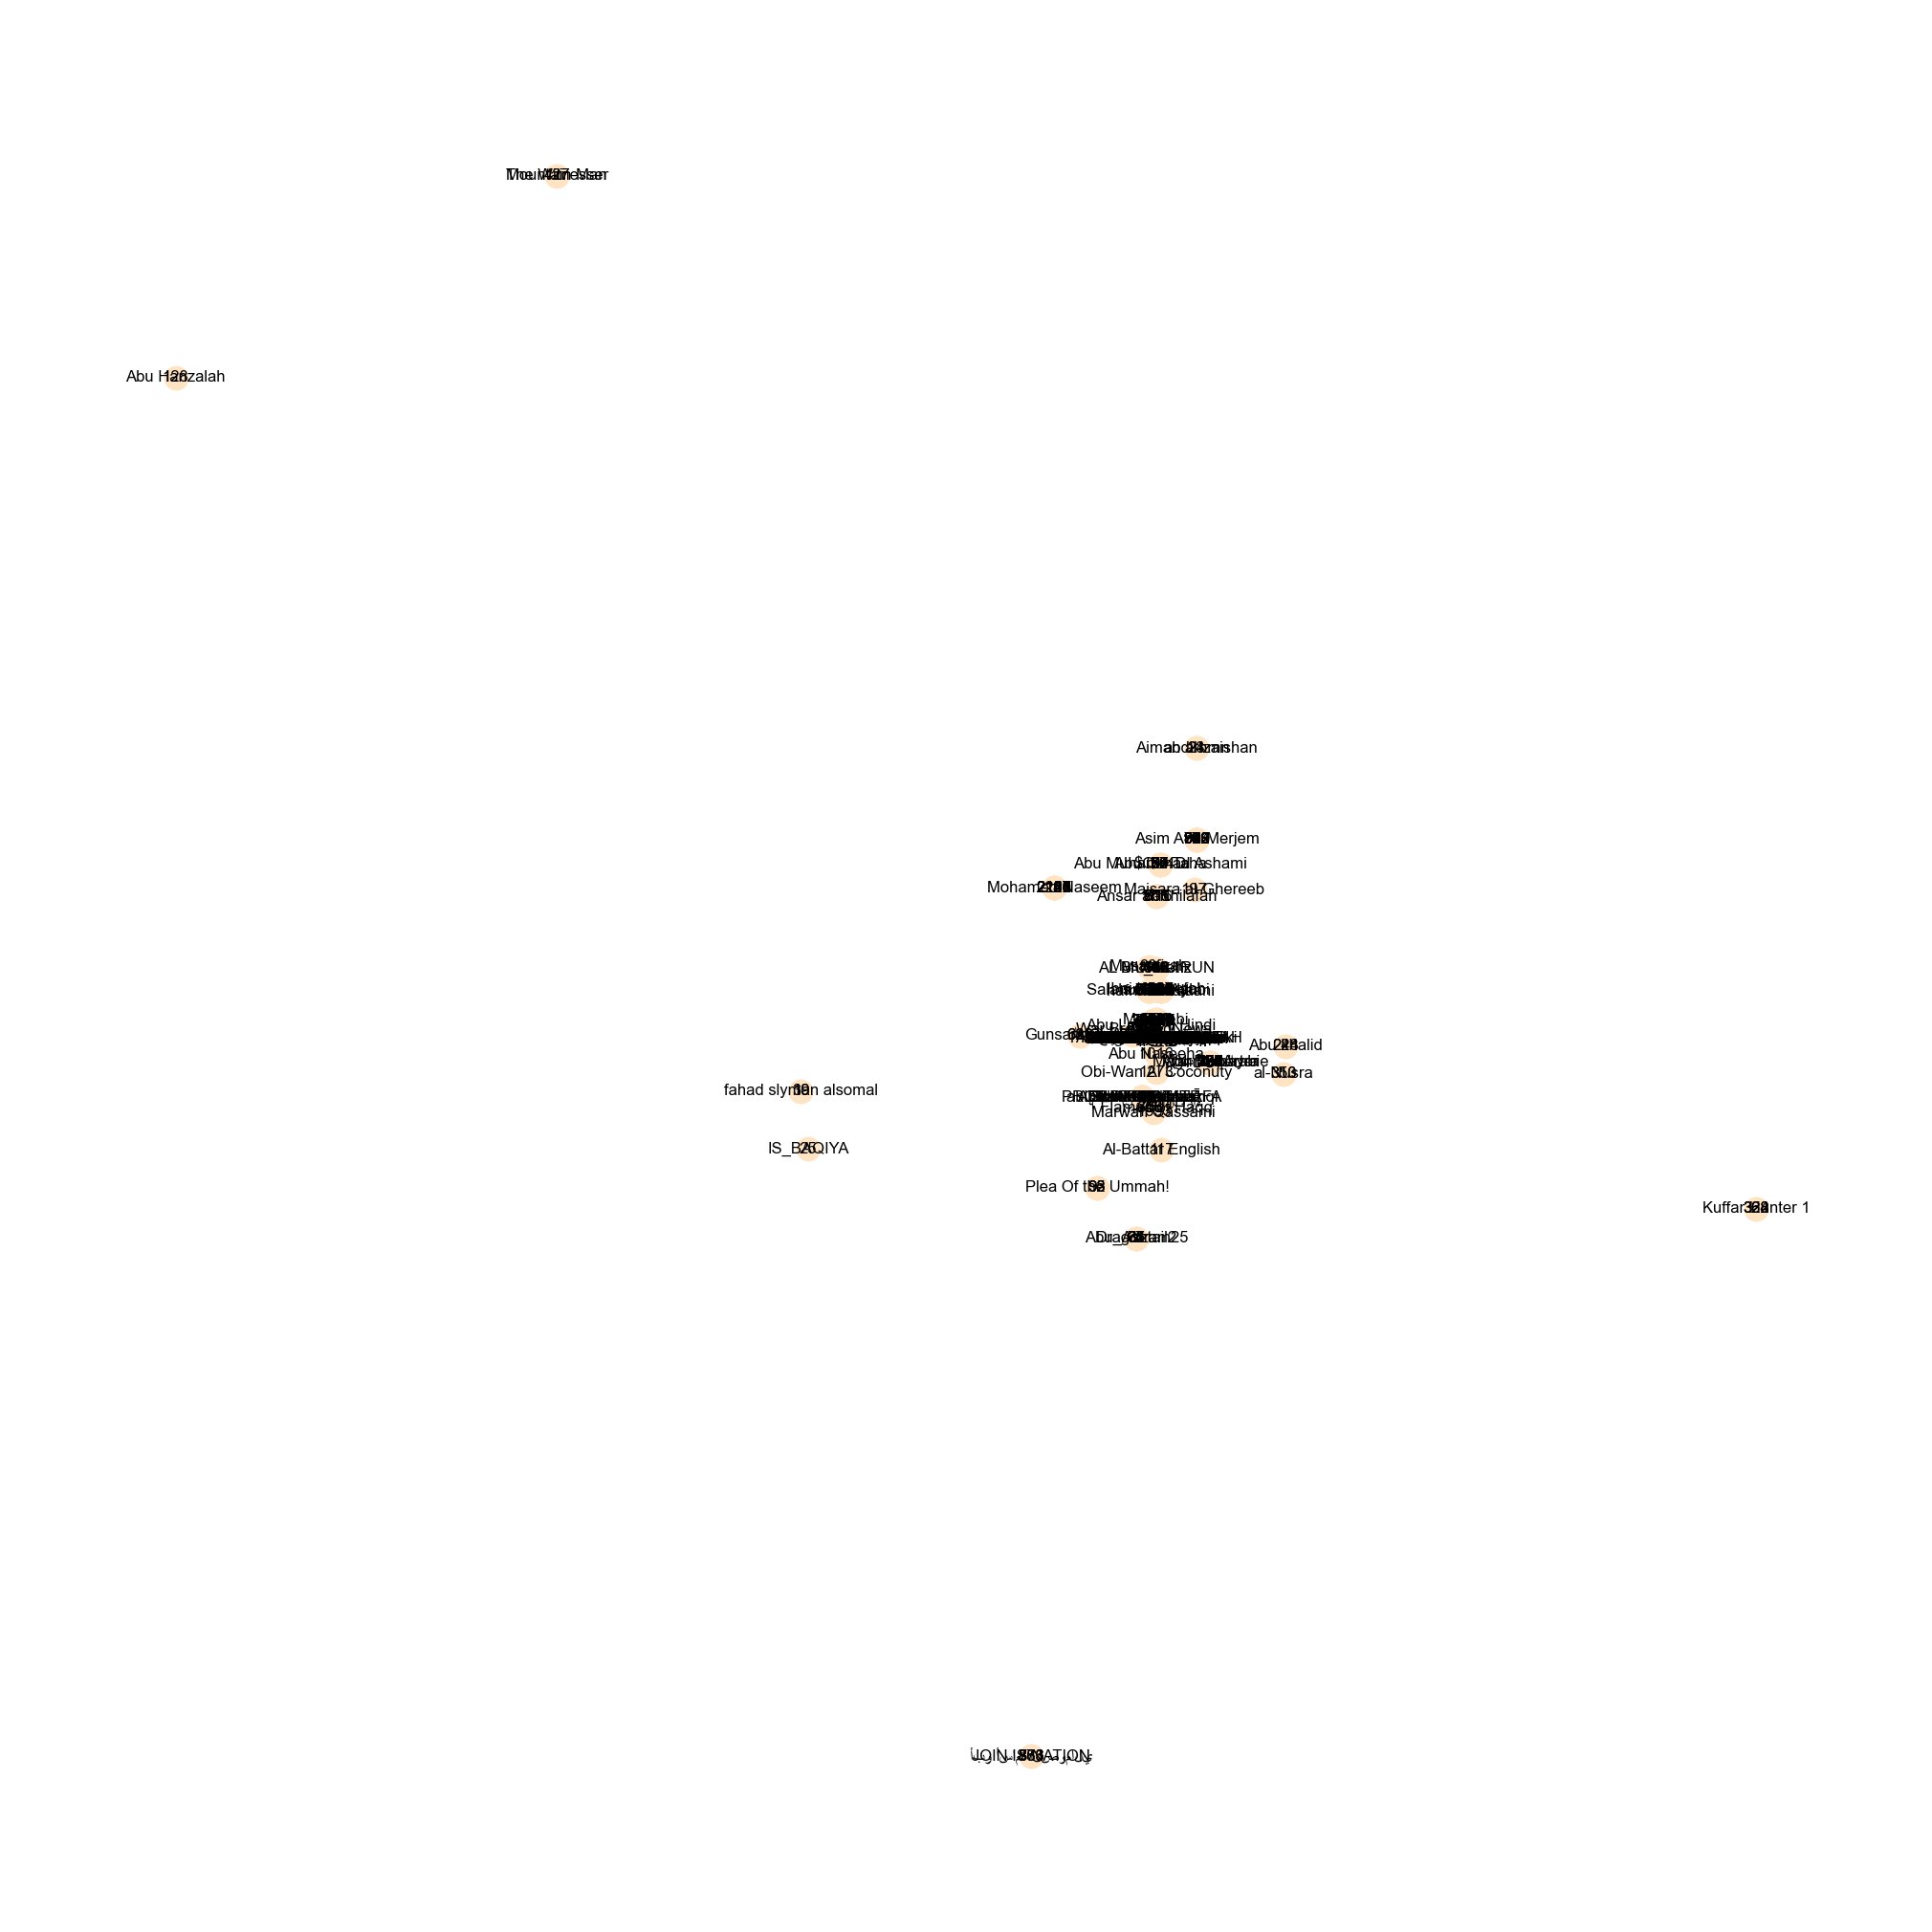

In [59]:
plt.figure(figsize=(20,20))
nx.draw_spectral(G, node_color='bisque', with_labels=True)

In [60]:
print('Number of nodes', len(fs_graph.nodes))
print('Number of edges', len(fs_graph.edges))
print('Average degree', sum(dict(fs_graph.degree).values()) / len(fs_graph.nodes))

Number of nodes 401
Number of edges 316
Average degree 1.5760598503740648


In [61]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [62]:
deg= dict(fs_graph.degree())
nx.set_node_attributes(fs_graph,deg,'degree')

bc=nx.betweenness_centrality(fs_graph)
nx.set_node_attributes(fs_graph,bc,'BC')

t= pd.DataFrame.from_dict(dict(fs_graph.nodes(data=True)),orient='index')
t[0:5]

degree        BC
GunsandCoffee            2  0.000013
640                      1  0.000000
Abu Layth Al Hindi       4  0.000075
68                       1  0.000000
ابو الدرداء #خلافة       2  0.000013

In [63]:
pos = nx.spring_layout(fs_graph, seed=675)

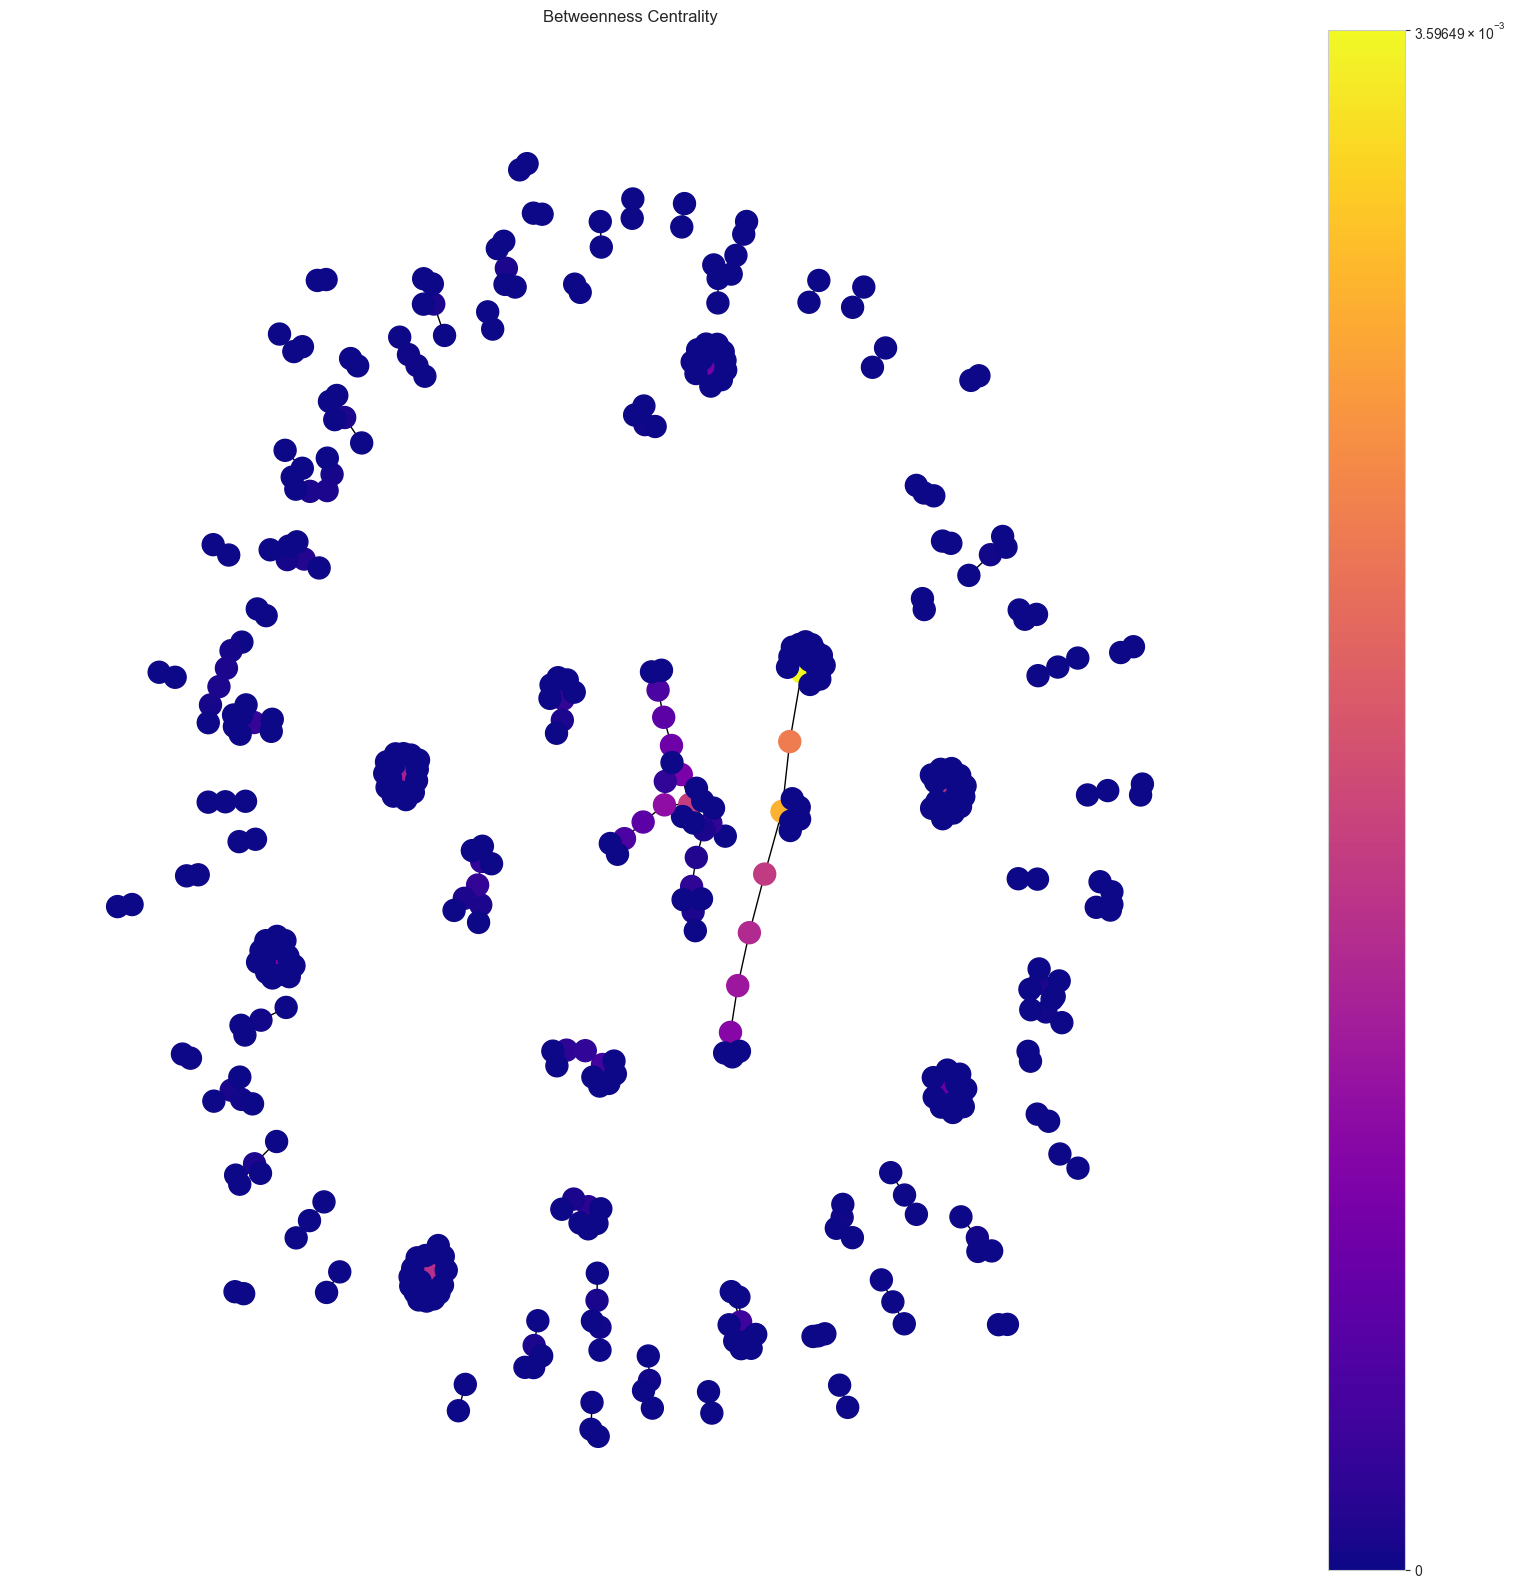

In [64]:
plt.figure(figsize=(20,20))
draw(fs_graph, pos, nx.betweenness_centrality(fs_graph), 'Betweenness Centrality')

In [65]:
t.sort_values('BC',ascending=False)[0:4]

degree        BC
Maghrabi Arabie         15  0.003596
Abu Humayra              7  0.002970
190                      2  0.002444
Abu Rikaz AlHijazi       7  0.001679

In [66]:
max(deg.keys() , key=lambda  x:deg[x])

'Rami'

In [67]:
deg= dict(fs_graph.degree())
nx.set_node_attributes(fs_graph,deg,'degree')

dc=nx.degree_centrality(fs_graph)
nx.set_node_attributes(fs_graph,dc,'DC')

t= pd.DataFrame.from_dict(dict(fs_graph.nodes(data=True)),orient='index')
t[0:5]

degree        BC      DC
GunsandCoffee            2  0.000013  0.0050
640                      1  0.000000  0.0025
Abu Layth Al Hindi       4  0.000075  0.0100
68                       1  0.000000  0.0025
ابو الدرداء #خلافة       2  0.000013  0.0050

In [68]:
t.sort_values('DC',ascending=False)[0:4]

degree        BC      DC
War BreakingNews      16  0.001504  0.0400
Rami                  16  0.001504  0.0400
Salahuddin Ayubi      15  0.001316  0.0375
Maghrabi Arabie       15  0.003596  0.0375

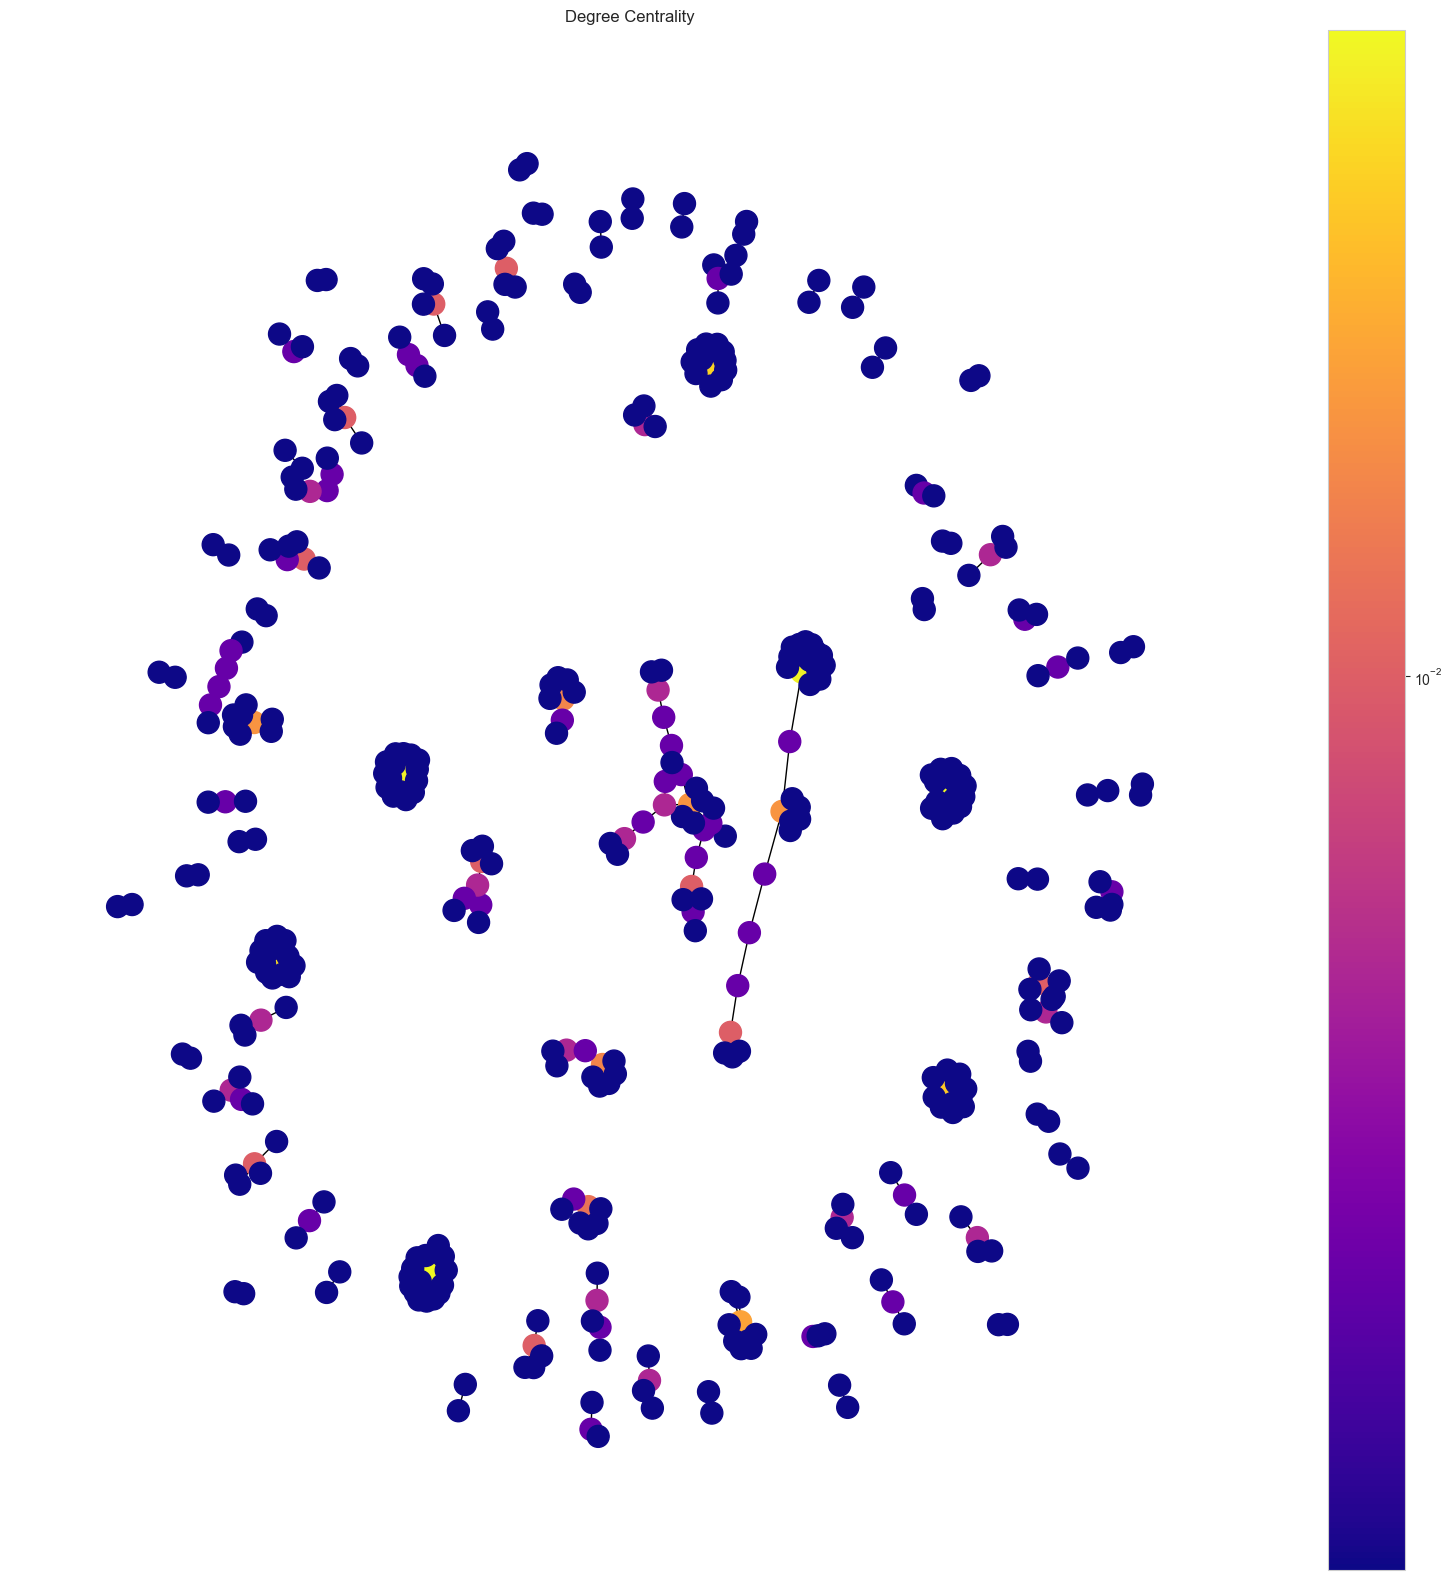

In [69]:
plt.figure(figsize=(20,20))
draw(G, pos, nx.degree_centrality(fs_graph), 'Degree Centrality')

In [70]:
cc=nx.clustering(nx.Graph(fs_graph))
cc

{'GunsandCoffee': 0,
 640: 0,
 'Abu Layth Al Hindi': 0,
 68: 0,
 'ابو الدرداء #خلافة': 0,
 904: 0,
 'abu baker aldimashqi': 0,
 112: 0,
 'IS_BAQIYA': 0,
 25: 0,
 119: 0,
 823: 0,
 'Kuffar Hunter 1': 0,
 324: 0,
 328: 0,
 362: 0,
 'al-Nusra': 0,
 350: 0,
 'War Reporter': 0,
 130: 0,
 'Abu Hanzalah': 0,
 128: 0,
 'The Witnesser': 0,
 427: 0,
 'Plea Of the Ummah!': 0,
 92: 0,
 623: 0,
 'Asim Abu Merjem': 0,
 742: 0,
 52: 0,
 50: 0,
 'abdlrhmn': 0,
 24: 0,
 'Mohamed Naseem': 0,
 2121: 0,
 'Maghrabi Arabie': 0,
 158: 0,
 'أبو أسامة الصومالي': 0,
 866: 0,
 129: 0,
 132: 0,
 'Bilal Ibn Rabah': 0,
 96: 0,
 139: 0,
 'Maisara al-Ghereeb': 0,
 197: 0,
 'Abu_Azzam25': 0,
 35: 0,
 'Abu khalid': 0,
 248: 0,
 'JOIN IS NATION': 0,
 873: 0,
 's.o.dawlah': 0,
 632: 0,
 'Abu Humayra': 0,
 193: 0,
 'fahad slyman alsomal': 0,
 19: 0,
 'General': 0,
 392: 0,
 'Abu Muhammad Ashami': 0,
 57: 0,
 'Musaafirah': 0,
 83: 0,
 'الولاء البراء': 0,
 411: 0,
 'Rami': 0,
 29209: 0,
 'Salahuddin Ayubi': 0,
 693: 0,
 'Ma

In [71]:
acc = nx.average_clustering(nx.Graph(fs_graph))
print(acc)

0.0


In [72]:
trans = nx.transitivity(fs_graph)
print(trans)

0


In [73]:
deg= dict(fs_graph.degree())
nx.set_node_attributes(fs_graph,deg,'degree')

hc=nx.harmonic_centrality(fs_graph)
nx.set_node_attributes(fs_graph,hc,'HC')

t= pd.DataFrame.from_dict(dict(fs_graph.nodes(data=True)),orient='index')
t[0:5]

degree        BC      DC   HC
GunsandCoffee            2  0.000013  0.0050  2.0
640                      1  0.000000  0.0025  1.5
Abu Layth Al Hindi       4  0.000075  0.0100  4.0
68                       1  0.000000  0.0025  2.5
ابو الدرداء #خلافة       2  0.000013  0.0050  2.0

In [74]:
t.sort_values('HC',ascending=False)[0:4]

degree        BC      DC         HC
Maghrabi Arabie       15  0.003596  0.0375  18.545238
Rami                  16  0.001504  0.0400  16.000000
War BreakingNews      16  0.001504  0.0400  16.000000
Salahuddin Ayubi      15  0.001316  0.0375  15.000000

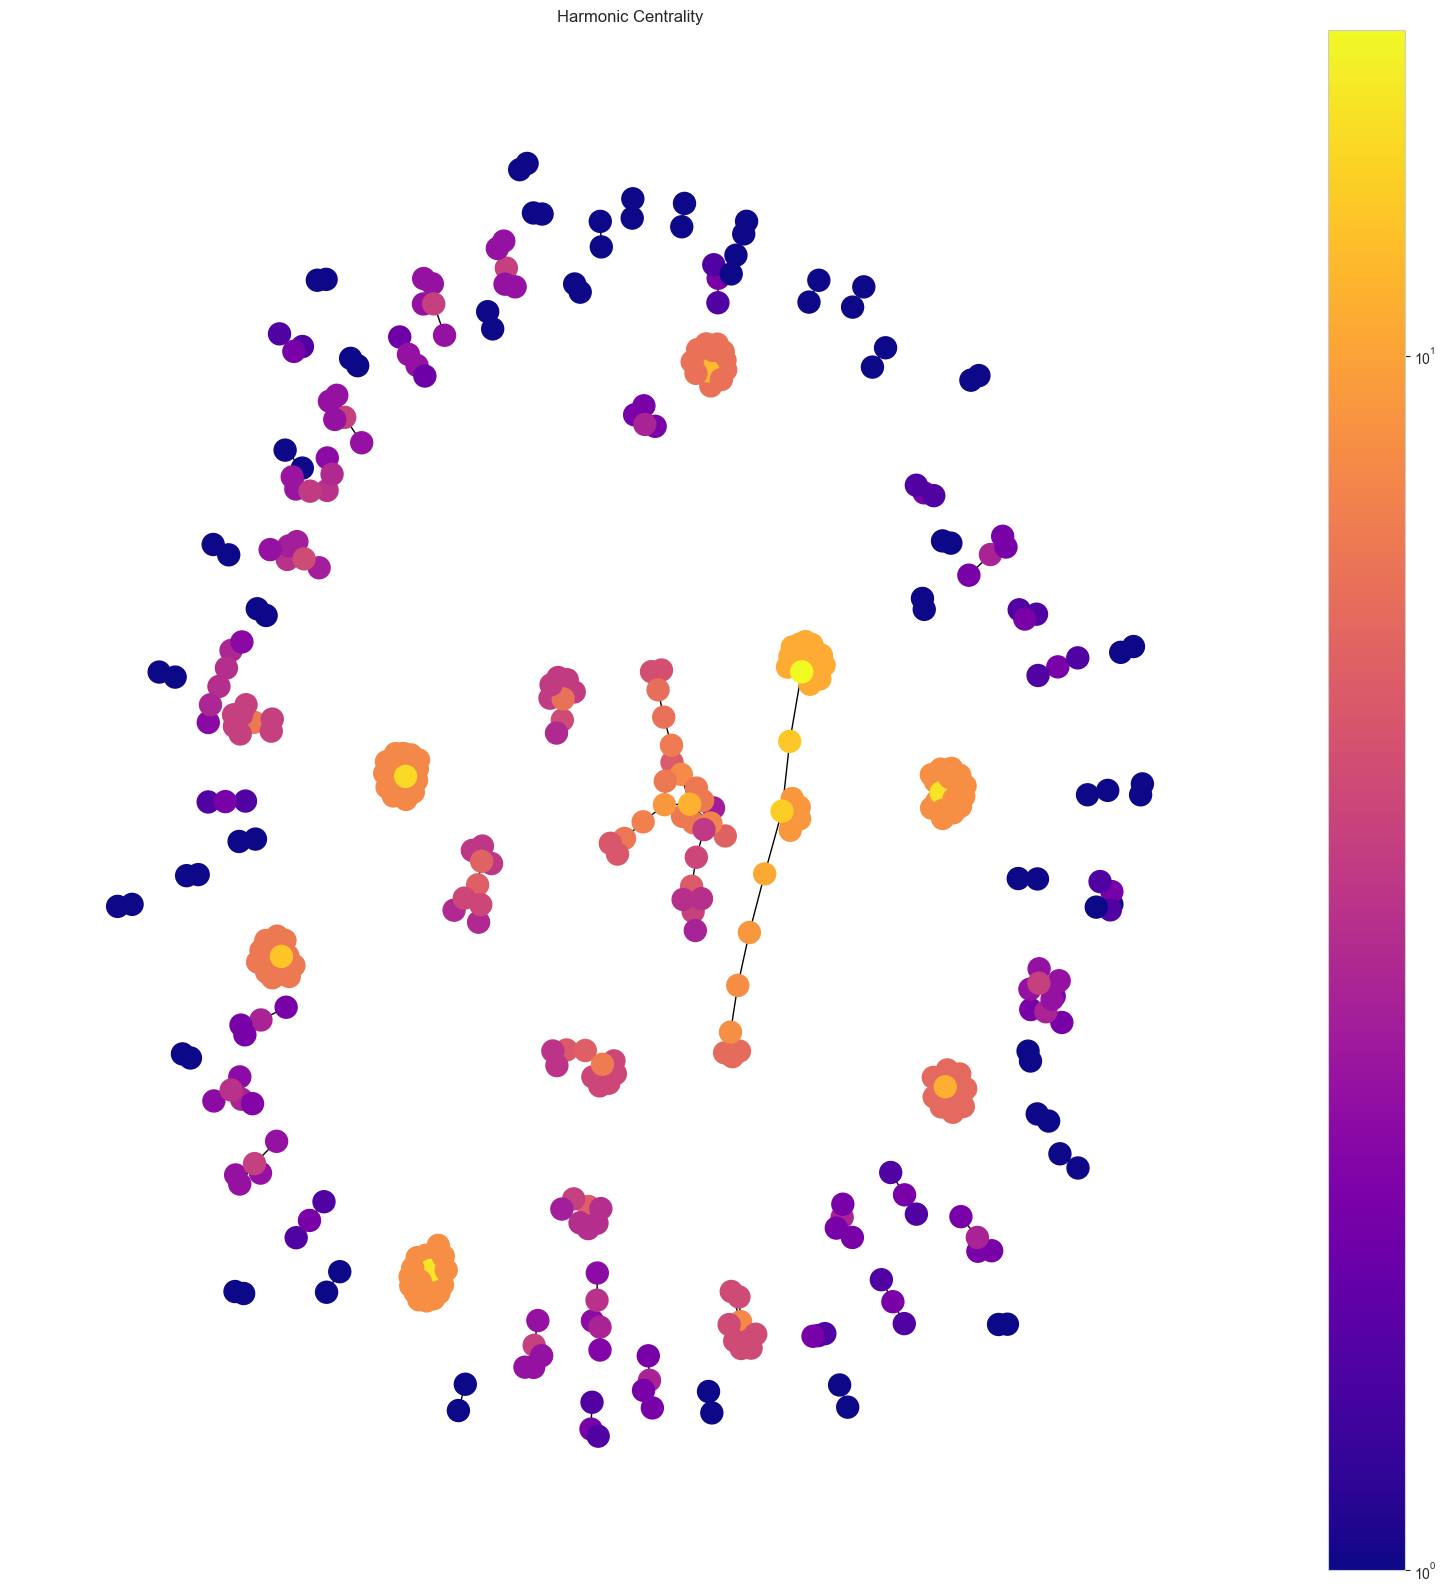

In [75]:
plt.figure(figsize=(20,20))
draw(fs_graph, pos, nx.harmonic_centrality(fs_graph), 'Harmonic Centrality')

In [77]:
dgr = nx.degree_centrality(fs_graph)
clo = nx.closeness_centrality(fs_graph)
har = nx.harmonic_centrality(fs_graph)
bet = nx.betweenness_centrality(fs_graph)
pgr = nx.pagerank(fs_graph)
hits = nx.hits(fs_graph)

In [78]:
centralities = pd.concat(
[pd.Series(c) for c in (hits[1], pgr, har, clo, hits[0], dgr, bet)],
axis=1)
centralities.columns = ("Authorities", "PageRank",
"Harmonic Closeness", "Closeness", "Hubs",
"Degree", "Betweenness")
centralities["Harmonic Closeness"] /= centralities.shape[0]

In [79]:
centralities["Harmonic Closeness"]

GunsandCoffee         0.004988
640                   0.003741
Abu Layth Al Hindi    0.009975
68                    0.006234
ابو الدرداء #خلافة    0.004988
                        ...   
238                   0.002494
Mountain Man          0.003741
Sabil Ghoraba         0.012610
268                   0.009559
81                    0.009144
Name: Harmonic Closeness, Length: 401, dtype: float64

In [80]:
# Calculate the correlations for each pair of centralities
import numpy as np
c_df = centralities.corr()
ll_triangle = np.tri(c_df.shape[0], k=-1)
c_df *= ll_triangle
c_series = c_df.stack().sort_values()
c_series.tail()

Betweenness  PageRank              0.631802
             Degree                0.679926
Hubs         Authorities           0.752286
Closeness    Harmonic Closeness    0.977702
Degree       PageRank              0.983433
dtype: float64

In [81]:
deg= dict(fs_graph.degree())
nx.set_node_attributes(fs_graph,deg,'degree')

cc = nx.closeness_centrality(fs_graph)
nx.set_node_attributes(fs_graph,cc,'CC')

t= pd.DataFrame.from_dict(dict(fs_graph.nodes(data=True)),orient='index')
t[0:5]

degree        BC      DC   HC        CC
GunsandCoffee            2  0.000013  0.0050  2.0  0.005000
640                      1  0.000000  0.0025  1.5  0.003333
Abu Layth Al Hindi       4  0.000075  0.0100  4.0  0.010000
68                       1  0.000000  0.0025  2.5  0.005714
ابو الدرداء #خلافة       2  0.000013  0.0050  2.0  0.005000

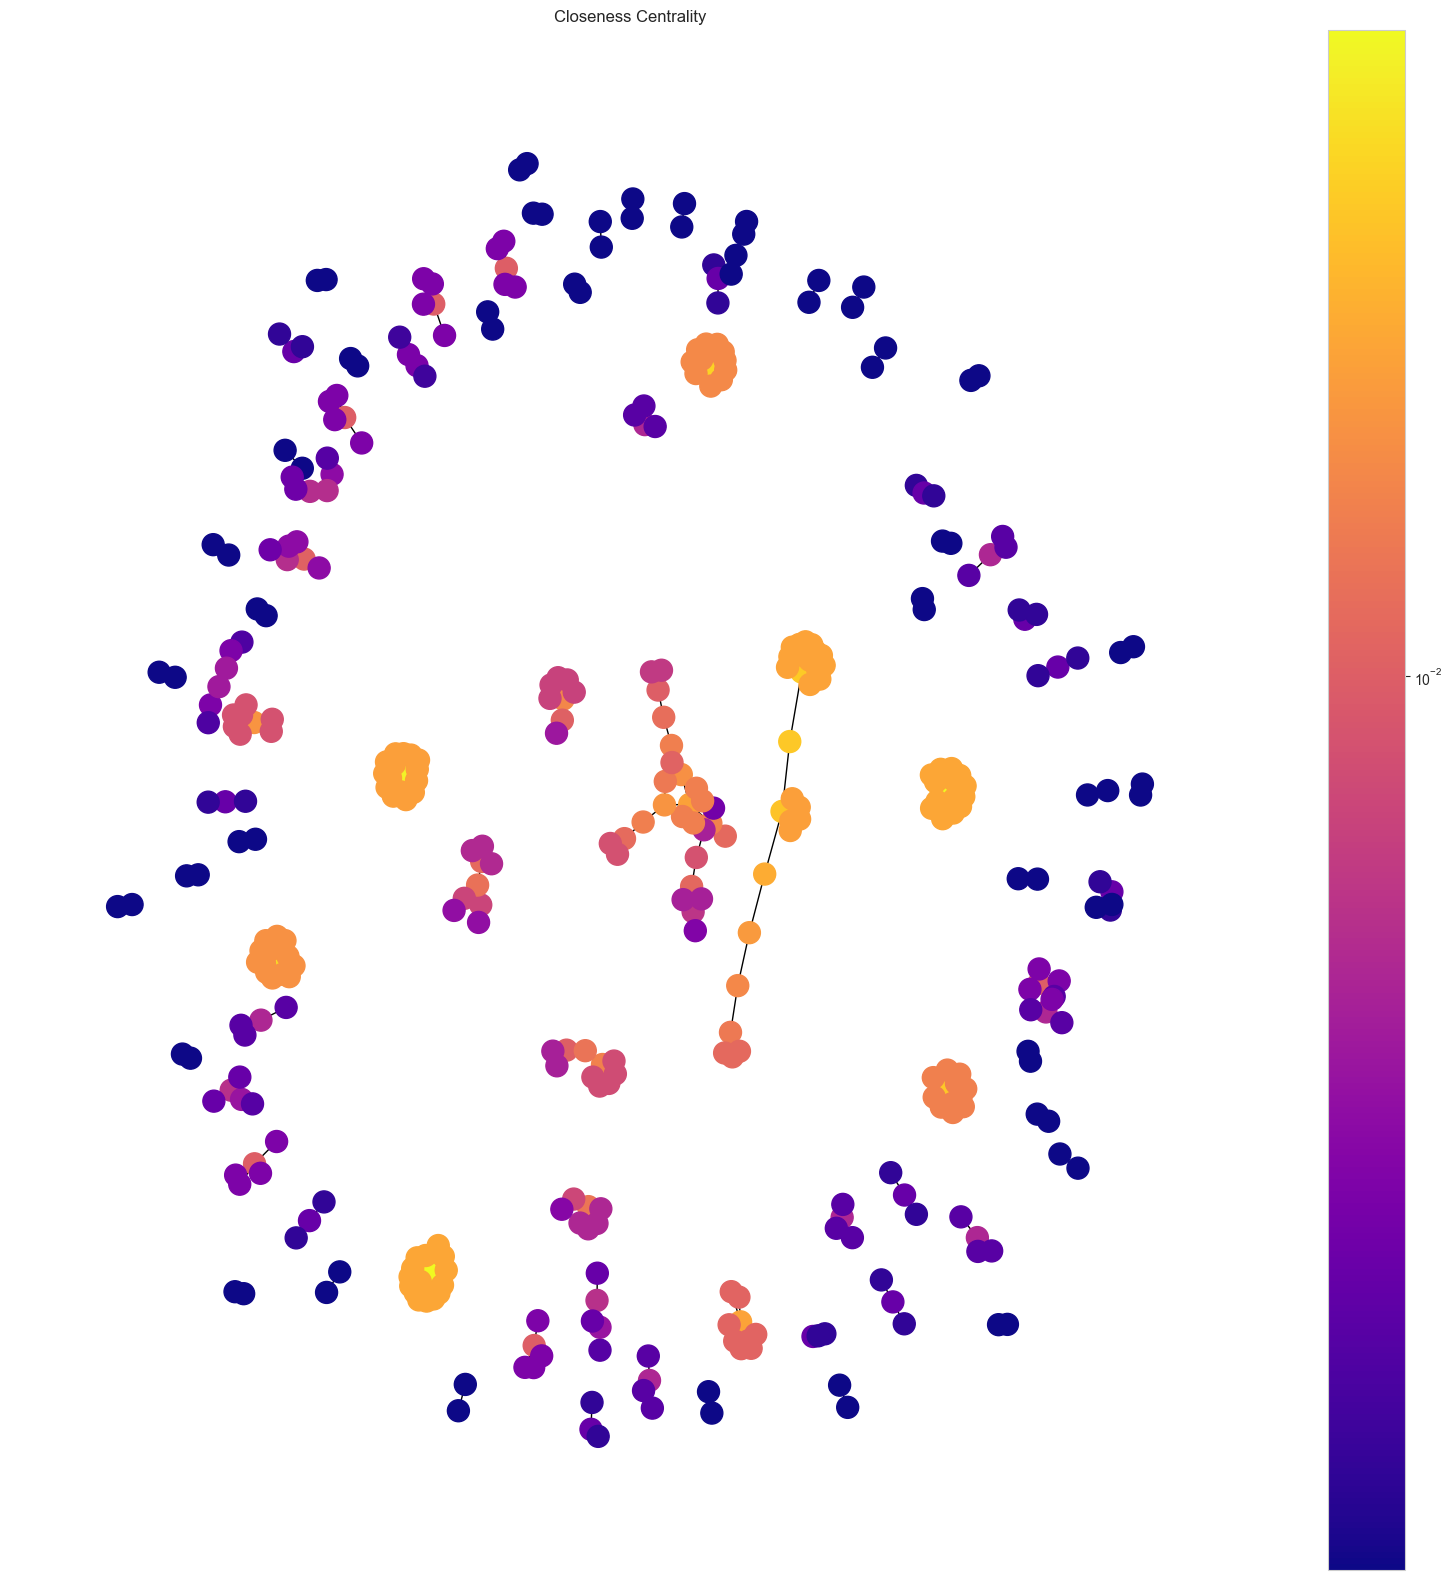

In [82]:
plt.figure(figsize=(20,20))
draw(G, pos, nx.closeness_centrality(fs_graph), 'Closeness Centrality')

In [83]:
deg= dict(fs_graph.degree())
nx.set_node_attributes(fs_graph,deg,'degree')

pgr = nx.pagerank(fs_graph)
nx.set_node_attributes(fs_graph,pgr,'PR')

t= pd.DataFrame.from_dict(dict(fs_graph.nodes(data=True)),orient='index')
t[0:5]

degree        BC      DC   HC        CC        PR
GunsandCoffee            2  0.000013  0.0050  2.0  0.005000  0.003639
640                      1  0.000000  0.0025  1.5  0.003333  0.001921
Abu Layth Al Hindi       4  0.000075  0.0100  4.0  0.010000  0.005930
68                       1  0.000000  0.0025  2.5  0.005714  0.001635
ابو الدرداء #خلافة       2  0.000013  0.0050  2.0  0.005000  0.003639

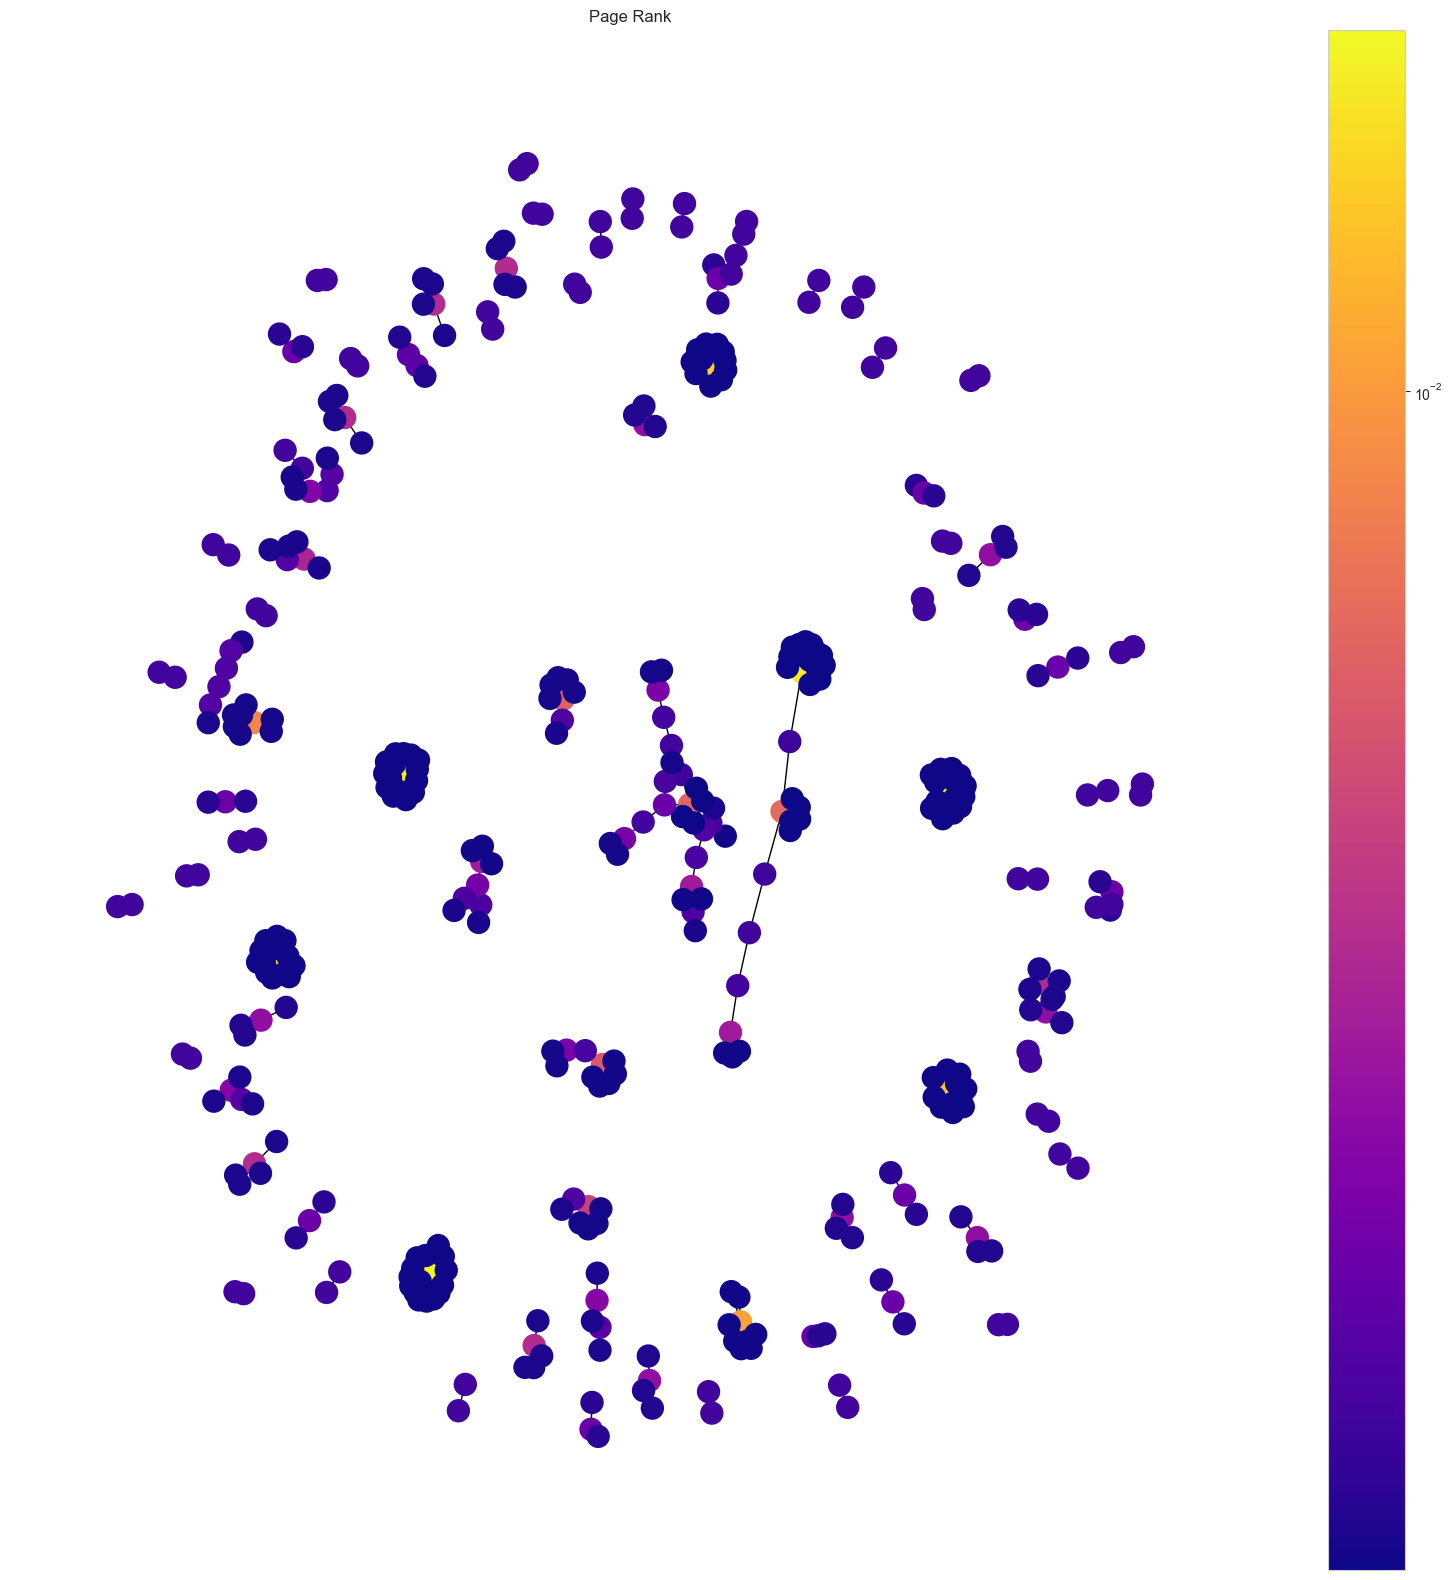

In [84]:
plt.figure(figsize=(20,20))
draw(G, pos, nx.pagerank(fs_graph), 'Page Rank')

In [86]:
#nx.shortest_path(fs_graph,'GunsandCoffee','ابو الدرداء #خلافة')